In [210]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
from joblib import dump,load


from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, SCORERS, confusion_matrix, classification_report,  precision_score, recall_score, ConfusionMatrixDisplay, PrecisionRecallDisplay, precision_recall_curve, RocCurveDisplay, roc_curve, auc, accuracy_score

from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV, ElasticNetCV, ElasticNet, LogisticRegressionCV, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline

In [6]:
df = pd.read_csv('../DATA/sonar.all-data.csv')

In [9]:
df.head()

,Freq_1,Freq_2,Freq_3,Freq_4,Freq_5,Freq_6,Freq_7,Freq_8,Freq_9,Freq_10,...,Freq_52,Freq_53,Freq_54,Freq_55,Freq_56,Freq_57,Freq_58,Freq_59,Freq_60,Label
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 61 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Freq_1   208 non-null    float64
 1   Freq_2   208 non-null    float64
 2   Freq_3   208 non-null    float64
 3   Freq_4   208 non-null    float64
 4   Freq_5   208 non-null    float64
 5   Freq_6   208 non-null    float64
 6   Freq_7   208 non-null    float64
 7   Freq_8   208 non-null    float64
 8   Freq_9   208 non-null    float64
 9   Freq_10  208 non-null    float64
 10  Freq_11  208 non-null    float64
 11  Freq_12  208 non-null    float64
 12  Freq_13  208 non-null    float64
 13  Freq_14  208 non-null    float64
 14  Freq_15  208 non-null    float64
 15  Freq_16  208 non-null    float64
 16  Freq_17  208 non-null    float64
 17  Freq_18  208 non-null    float64
 18  Freq_19  208 non-null    float64
 19  Freq_20  208 non-null    float64
 20  Freq_21  208 non-null    float64
 21  Freq_22  208 non

In [44]:
df['Label'].unique()

array(['R', 'M'], dtype=object)

In [58]:
df['Label'] = df['Label'].apply(lambda x: 0 if x=='R' else 1)

/var/folders/sl/4slwjbhd1rz6q3665v1k847c0000gn/T/ipykernel_55255/24500836.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df,x='Label',palette='Set1')


<Axes: xlabel='Label', ylabel='count'>

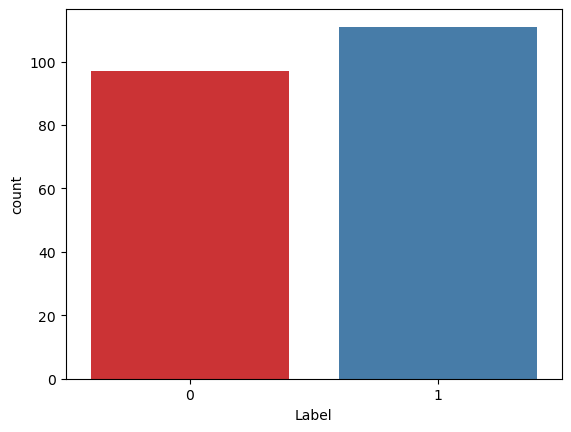

In [60]:
sns.countplot(data=df,x='Label',palette='Set1')

<Axes: >

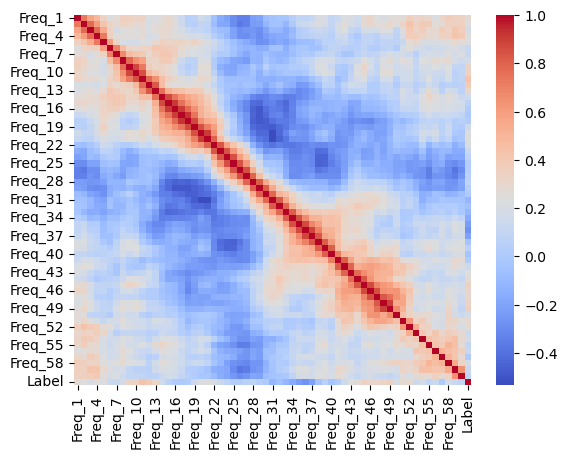

In [63]:
sns.heatmap(df.corr(),cmap='coolwarm')

In [95]:
np.abs(df.corr().loc['Label']).sort_values().tail(6)

Freq_45    0.339406
Freq_10    0.341142
Freq_49    0.351312
Freq_12    0.392245
Freq_11    0.432855
Label      1.000000
Name: Label, dtype: float64

In [77]:
df.corr()

,Freq_1,Freq_2,Freq_3,Freq_4,Freq_5,Freq_6,Freq_7,Freq_8,Freq_9,Freq_10,...,Freq_52,Freq_53,Freq_54,Freq_55,Freq_56,Freq_57,Freq_58,Freq_59,Freq_60,Label
Freq_1,1.000000,0.735896,0.571537,0.491438,0.344797,0.238921,0.260815,0.355523,0.353420,0.318276,...,0.355299,0.311729,0.322299,0.312067,0.220642,0.313725,0.368132,0.357116,0.347078,0.271694
Freq_2,0.735896,1.000000,0.779916,0.606684,0.419669,0.332329,0.279040,0.334615,0.316733,0.270782,...,0.434548,0.346076,0.383960,0.380165,0.262263,0.280341,0.353042,0.352200,0.358761,0.231238
Freq_3,0.571537,0.779916,1.000000,0.781786,0.546141,0.346275,0.190434,0.237884,0.252691,0.219637,...,0.394076,0.332914,0.367186,0.289731,0.287661,0.380819,0.334108,0.425047,0.373948,0.192195
Freq_4,0.491438,0.606684,0.781786,1.000000,0.726943,0.352805,0.246440,0.246742,0.247078,0.237769,...,0.374651,0.364772,0.334211,0.284955,0.280938,0.340254,0.344865,0.420266,0.400626,0.250638
Freq_5,0.344797,0.419669,0.546141,0.726943,1.000000,0.597053,0.335422,0.204006,0.177906,0.183219,...,0.266617,0.314985,0.205306,0.196472,0.199323,0.219395,0.238793,0.290982,0.253710,0.222232
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Freq_57,0.313725,0.280341,0.380819,0.340254,0.219395,0.161333,0.186324,0.267212,0.193963,0.140327,...,0.191264,0.308197,0.361443,0.387204,0.515154,1.000000,0.509805,0.431295,0.287219,0.000933
Freq_58,0.368132,0.353042,0.334108,0.344865,0.238793,0.203986,0.242646,0.287603,0.231745,0.212277,...,0.309673,0.370764,0.404117,0.503465,0.463659,0.509805,1.000000,0.550235,0.329827,0.184191
Freq_59,0.357116,0.352200,0.425047,0.420266,0.290982,0.220573,0.183578,0.194400,0.097293,0.058273,...,0.298711,0.346095,0.447118,0.453658,0.430804,0.431295,0.550235,1.000000,0.642872,0.130826
Freq_60,0.347078,0.358761,0.373948,0.400626,0.253710,0.178158,0.222493,0.146216,0.095243,0.097358,...,0.195379,0.280780,0.283471,0.264399,0.349449,0.287219,0.329827,0.642872,1.000000,0.090055


In [312]:
# Будем делать кросс-валидацию на 10%

X = df.drop('Label',axis=1)
y = df['Label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.1, random_state=42)

scaler = StandardScaler()

scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

knn_model = KNeighborsClassifier(n_neighbors=1)

knn_model.fit(scaled_X_train,y_train)

y_pred = knn_model.predict(scaled_X_test)

In [314]:
confusion_matrix(y_test,y_pred)

array([[ 7,  1],
       [ 1, 12]])

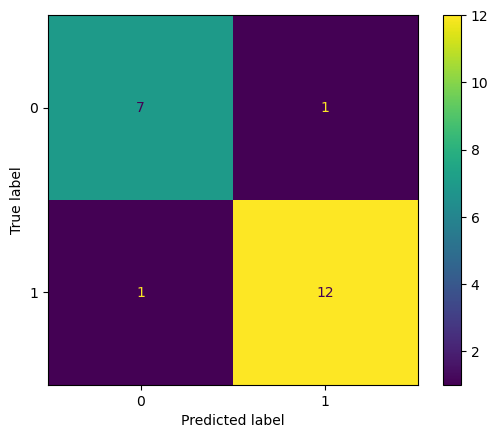

In [316]:
ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred)).plot()

In [176]:
print(precision_score(y_test,y_pred))
print(recall_score(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

0.9230769230769231
0.9230769230769231
0.9047619047619048


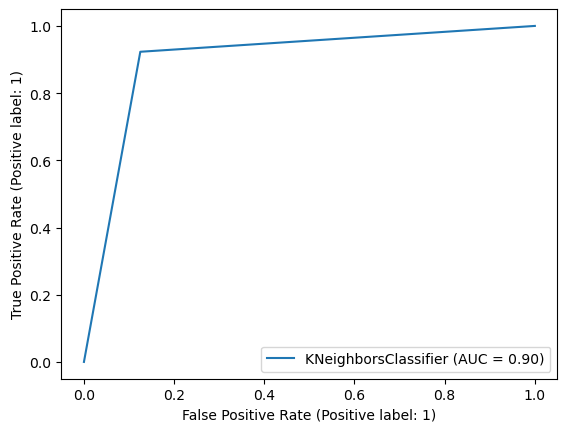

In [178]:
RocCurveDisplay.from_estimator(knn_model,scaled_X_test,y_test)

# Пробежимся циклом и найдем лучшее K

In [389]:
X = df.drop('Label',axis=1)
y = df['Label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.1, random_state=42)

scaler = StandardScaler()

scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

test_error_rates = []
for k in range(1,30):
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(scaled_X_train,y_train)
    
    y_pred = knn_model.predict(scaled_X_test)
    
    test_error = 1 - accuracy_score(y_test,y_pred)
    test_error_rates.append(test_error)

(0.0, 0.25)

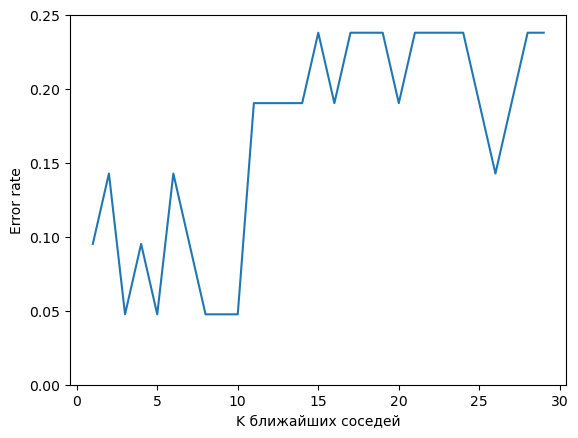

In [395]:
plt.plot(range(1,30),test_error_rates)
plt.ylabel('Error rate')
plt.xlabel('K ближайших соседей')
plt.ylim(0,0.25)

# Применим pipeline

In [405]:
scaler = StandardScaler()
knn_model = KNeighborsClassifier()

In [407]:
knn_model.get_params().keys()

dict_keys(['algorithm', 'leaf_size', 'metric', 'metric_params', 'n_jobs', 'n_neighbors', 'p', 'weights'])

In [415]:
X = df.drop('Label',axis=1)
y = df['Label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.1, random_state=42)

operations = [('scaler',scaler),('knn_model',knn_model)]

pipe = Pipeline(operations)
k = np.arange(1,30)
param_grid = ({'knn_model__n_neighbors':k})

full_cv_classifier = GridSearchCV(pipe,param_grid,cv=5,scoring='accuracy')
full_cv_classifier.fit(X_train,y_train)

y_pred = full_cv_classifier.predict(X_test)

Text(0, 0.5, 'Accuracy')

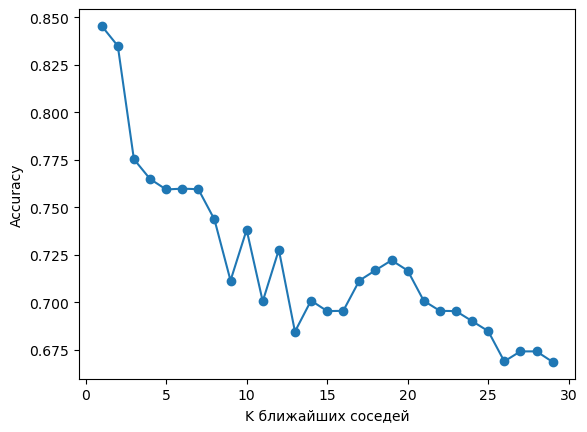

In [419]:
scores = full_cv_classifier.cv_results_['mean_test_score']
plt.plot(k,scores,'o-')
plt.xlabel('K ближайших соседей')
plt.ylabel("Accuracy")

In [421]:
confusion_matrix(y_test,y_pred)

array([[ 7,  1],
       [ 1, 12]])

In [423]:
y_pred = full_cv_classifier.predict(X_test)

In [425]:
print(precision_score(y_test,y_pred))
print(recall_score(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

0.9230769230769231
0.9230769230769231
0.9047619047619048


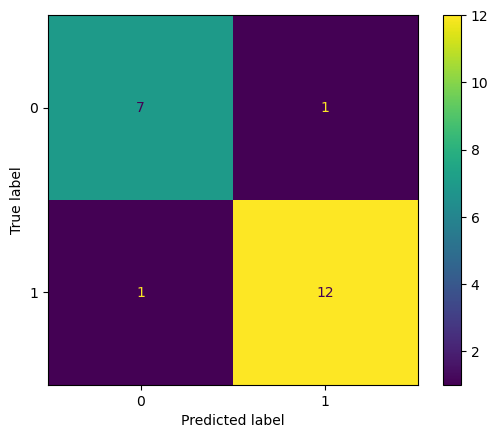

In [379]:
ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred)).plot()